In [1]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING

import numpy as np 
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import shap
from pandas_profiling import ProfileReport 

import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')
df['blueWins'] = df['blueWins'].map({1: 'Blue Side', 0:'Red Side'})

isneg = []
for i in df.blueGoldDiff :
    if i < 0 :
        isneg.append(0)
    else :
        isneg.append(1)
df['blueGoldDiffSituation'] = isneg
isneg = []
for i in df.redGoldDiff :
    if i < 0 :
        isneg.append(0)
    else :
        isneg.append(1)
df['redGoldDiffSituation'] = isneg

isneg = []
for i in df.blueExperienceDiff :
    if i < 0 :
        isneg.append(0)
    else :
        isneg.append(1)
df['blueExperienceDiffSituation'] = isneg
isneg = []
for i in df.redExperienceDiff :
    if i < 0 :
        isneg.append(0)
    else :
        isneg.append(1)
df['redExperienceDiffSituation'] = isneg

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   object 
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

None

In [4]:
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822  Red Side               28                   2               1   
1  4523371949  Red Side               12                   1               0   
2  4521474530  Red Side               15                   0               0   
3  4524384067  Red Side               43                   1               0   
4  4436033771  Red Side               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  blueGoldDiffSituation  \
0                  8         19.7         1656.7                      1   
1               1173         24.0         1762.0                      0   
2               1033         20.3         1728.5                      0   
3                  7         23.5         1647.8                      0   
4               -230         22.5         1740.4                      0   

   redGoldDiffSituation  blueExperienceDiffSituation  \
0                     0                            0   
1                     1                            0   
2                     1                            0   
3                     1                            0   
4                     1                            1   

   redExperienceDiffSituation  
0                           1  
1                           1  
2                           1  
3                           1  
4                           0  

[5 rows x 44 columns]

In [5]:
#report_data = ProfileReport(df.sample(2000))
#report_data

In [6]:
color_discrete_map = {'Blue Side': 'rgb(122, 148, 231)', 'Red Side': 'rgb(255, 105, 97)'}

fig = px.histogram(df, x="blueWins",color = 'blueWins', color_discrete_map=color_discrete_map,
                  labels={
                     "blueWins": "Sides","count": "Wins",
                 },
                title="Total Wins per Side",
                hover_name="blueWins",       
                  )
# fig.show()
py.offline.iplot(fig)

In [7]:
color_discrete_map = {'Blue': 'rgb(122, 148, 231)', 'Red': 'rgb(255, 105, 97)'}

layout = go.Layout(
    yaxis=dict(
        range=[5, 45]
    ),
    xaxis=dict(
        range=[100, 200]
    )
)

tmp1 = df[['blueWardsPlaced', 'blueWardsDestroyed']].copy()
tmp1.columns = ['WardsPlaced','WardsDestroyed']
tmp1 = tmp1.astype(float)
tmp1['Side'] = 'Blue'
tmp2 = df[['redWardsPlaced', 'redWardsDestroyed']].copy()
tmp2.columns = ['WardsPlaced','WardsDestroyed']
tmp2 = tmp2.astype(float)
tmp2['Side'] = 'Red'
data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="WardsPlaced", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Wards Placed per Side')
fig2 = px.violin(data, y="WardsPlaced", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Wards Placed per Side Zoomed')
fig2.update_layout(
    yaxis=dict(
        range=[5, 45]
    )
)
fig1.show()
fig2.show()

In [8]:
fig1 = px.violin(data, y="WardsDestroyed", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Wards Destroyed per Side')
fig2 = px.violin(data, y="WardsDestroyed", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Wards Destroyed per Side Zoomed')
fig2.update_layout(
    yaxis=dict(
        range=[0, 10]
    )
)
fig1.show()
fig2.show()

In [9]:
color_discrete_map = {'Blue': 'rgb(122, 148, 231)', 'Red': 'rgb(255, 105, 97)'}

tmp1 = df[['blueFirstBlood']].copy()
tmp1.columns = ['FirstBloods']
tmp1 = tmp1.astype(float)
tmp1['Side'] = 'Blue'
tmp2 = df[['redFirstBlood']].copy()
tmp2.columns = ['FirstBloods']
tmp2 = tmp2.astype(float)
tmp2['Side'] = 'Red'
data = pd.concat([tmp1, tmp2])
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x='Side', y='FirstBloods',color = 'Side', color_discrete_map=color_discrete_map, title = 'Mean First Bloods per Side')
fig.show()

In [10]:
col = ['blueKills','blueDeaths','blueAssists','redKills','redDeaths','redAssists']
tmp1 = df[col[0:3]].copy()
tmp1.columns = ['Kills','Death','Assistes']
tmp1['Side'] = 'Blue'
tmp2 = df[col[3:6]].copy()
tmp2.columns = ['Kills','Death','Assistes']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()
data = pd.melt(data, id_vars=['Side'], value_vars=['Kills','Death','Assistes'])
data.columns = ['Side','KDA','Mean']

fig = px.bar(data, x="Side", y="Mean", color="Side", color_discrete_map=color_discrete_map,
             facet_col="KDA", title = 'Mean KDA per Side'
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()

In [11]:
col = ['blueKills','blueDeaths','blueAssists','redKills','redDeaths','redAssists']
tmp1 = df[col[0:3]].copy()
tmp1.columns = ['Kills','Death','Assistes']
tmp1['Side'] = 'Blue'
tmp2 = df[col[3:6]].copy()
tmp2.columns = ['Kills','Death','Assistes']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
# data = data.groupby('Side').sum().reset_index()
data = pd.melt(data, id_vars=['Side'], value_vars=['Kills','Death','Assistes'])
data.columns = ['Side','KDA','Total']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=data[data['Side'] == 'Red']['KDA'], values=data[data['Side'] == 'Red']['Total'], name="Red Side"),
              1, 1)
fig.add_trace(go.Pie(labels=data[data['Side'] == 'Blue']['KDA'], values=data[data['Side'] == 'Blue']['Total'], name="Blue Side"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name+value")

fig.update_layout(
    title_text="KDA Proportion per Side",
    annotations=[dict(text='Red', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Blue', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [12]:
col = ['blueEliteMonsters','blueDragons','blueHeralds','redEliteMonsters','redDragons','redHeralds']
tmp1 = df[col[0:3]].copy()
tmp1.columns = ['EliteMonsters','Dragons','Heralds']
tmp1['Side'] = 'Blue'
tmp2 = df[col[3:6]].copy()
tmp2.columns = ['EliteMonsters','Dragons','Heralds']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()
data=pd.melt(data, id_vars=['Side'], value_vars=['EliteMonsters','Dragons','Heralds'])
data.columns = ['Side','NeutralGoals','Mean']

fig = px.bar(data, x="Side", y="Mean", color="Side", color_discrete_map=color_discrete_map,
             facet_col="NeutralGoals", title = 'Mean Neutral Goals per Side'
            )
fig.show()

In [13]:
col = ['blueTowersDestroyed', 'redTowersDestroyed']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['TowersDestroyed']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['TowersDestroyed']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()
data

fig = px.bar(data, x="Side", y="TowersDestroyed", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Turrets Destroyed per Side'
            )
fig.show()

In [14]:
col = ['blueTotalGold', 'redTotalGold']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['TotalGold']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['TotalGold']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()


fig = px.bar(data, x="Side", y="TotalGold", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Gold per Side'
            )
fig.show()

data = pd.concat([tmp1, tmp2], ignore_index = True)
data

fig1 = px.violin(data, y="TotalGold", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Total Gold per Side Distribution')
fig1.show()

In [15]:
col = ['blueAvgLevel', 'redAvgLevel']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['AvgLevel']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['AvgLevel']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()


fig = px.bar(data, x="Side", y="AvgLevel", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Level per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="AvgLevel", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Level per Side Distribution')
fig1.show()

In [16]:
# blueTotalMinionsKilled

col = ['blueTotalMinionsKilled', 'redTotalMinionsKilled']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['TotalMinionsKilled']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['TotalMinionsKilled']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()


fig = px.bar(data, x="Side", y="TotalMinionsKilled", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Minions Killede per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="TotalMinionsKilled", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Total Minions Killed per Side Distribution')
fig1.show()

In [17]:
# blueTotalJungleMinionsKilled

col = ['blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['TotalJungleMinionsKilled']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['TotalJungleMinionsKilled']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()


fig = px.bar(data, x="Side", y="TotalJungleMinionsKilled", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Jungle Minions Killed per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="TotalJungleMinionsKilled", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Total Jungle Minions Killed per Side Distribution')
fig1.show()

In [18]:
# blueGoldDiff

col = ['blueGoldDiff', 'redGoldDiff']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['GoldDiff']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['GoldDiff']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x="Side", y="GoldDiff", color="Side", color_discrete_map=color_discrete_map, title = 'Mean Gold Diff per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="GoldDiff", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Gold Diff per Side Distribution')
fig1.show()

In [19]:
# blueExperienceDiff

col = ['blueExperienceDiff', 'redExperienceDiff']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['ExperienceDiff']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['ExperienceDiff']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x="Side", y="ExperienceDiff", color="Side", color_discrete_map=color_discrete_map, title = 'Mean Experience Difference per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="ExperienceDiff", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Experience Difference per Side Distribution')
fig1.show()

In [20]:
# blueCSPerMin	

col = ['blueCSPerMin', 'redCSPerMin']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['CSPerMin']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['CSPerMin']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x="Side", y="CSPerMin", color="Side", color_discrete_map=color_discrete_map, title = 'Mean CS Per Min per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="CSPerMin", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'CS Per Min per Side Distribution')
fig1.show()

In [21]:
# blueGoldPerMin

col = ['blueGoldPerMin', 'redGoldPerMin']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['GoldPerMin']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['GoldPerMin']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x="Side", y="GoldPerMin", color="Side", color_discrete_map=color_discrete_map, title = 'Mean Gold Per Min per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="GoldPerMin", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Gold Per Min per Side Distribution')
fig1.show()

Text(0.5, 1.0, 'Blue Side Features Correlation')

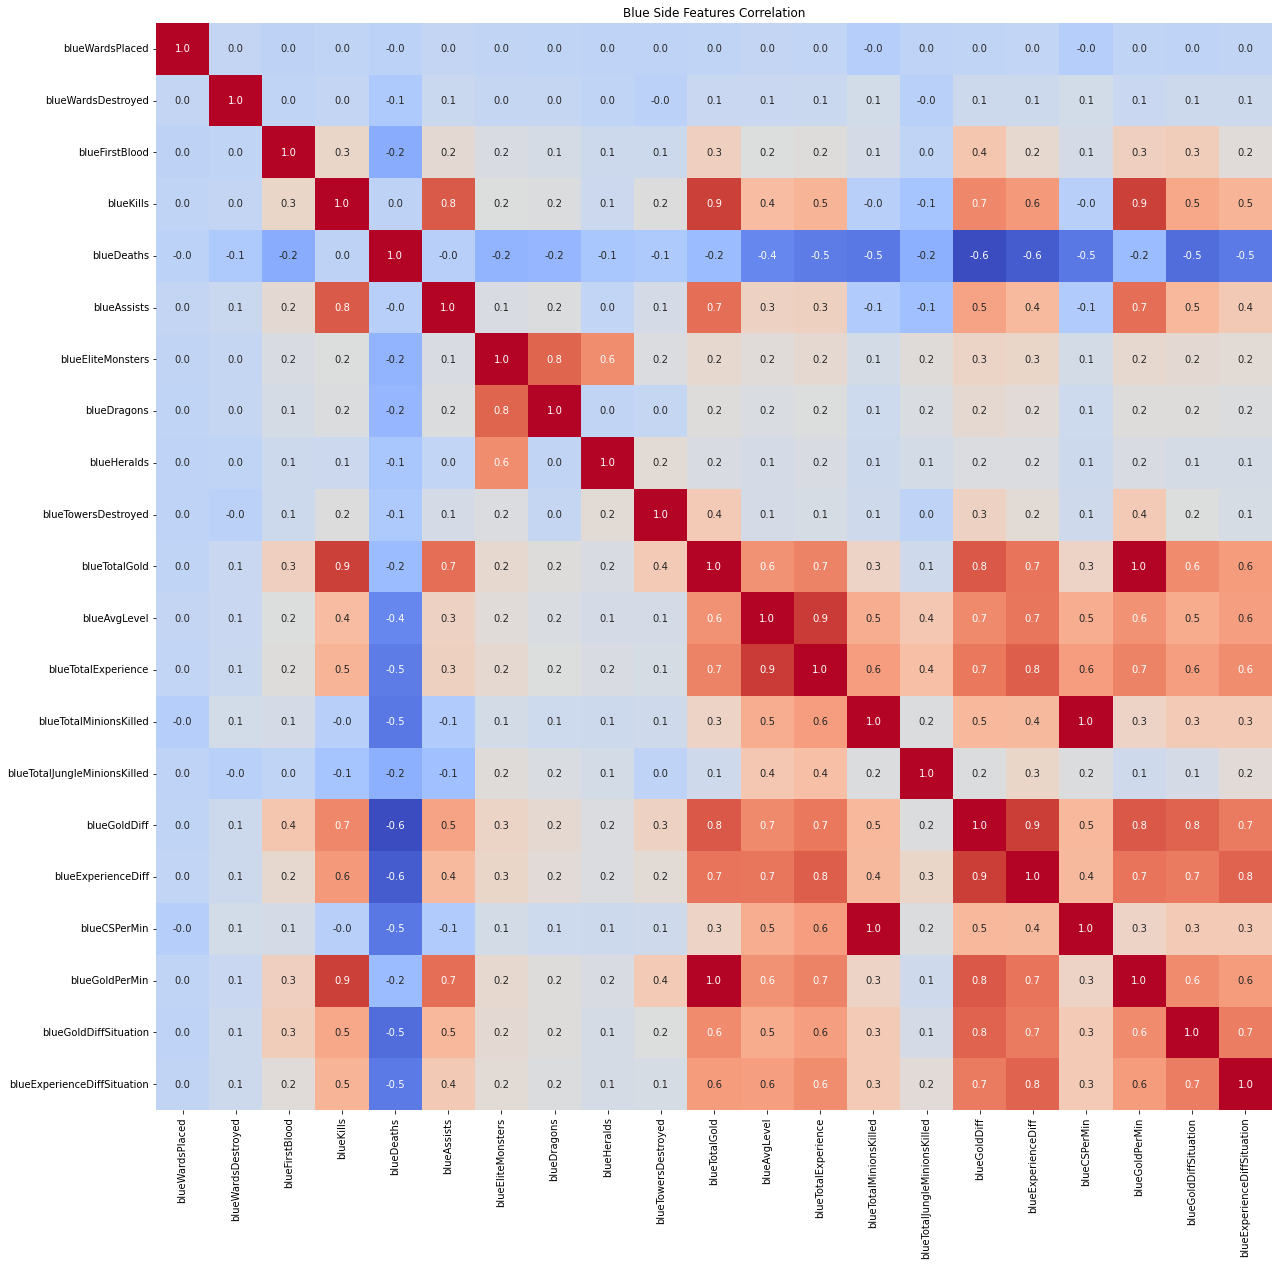

In [22]:
corr = df[[col for col in df.columns if 'blue' in col and col != 'blueWins']].corr()
f,ax = plt.subplots(figsize=(20, 20))
p = sns.heatmap(corr,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                ax=ax)
p.set_title('Blue Side Features Correlation')

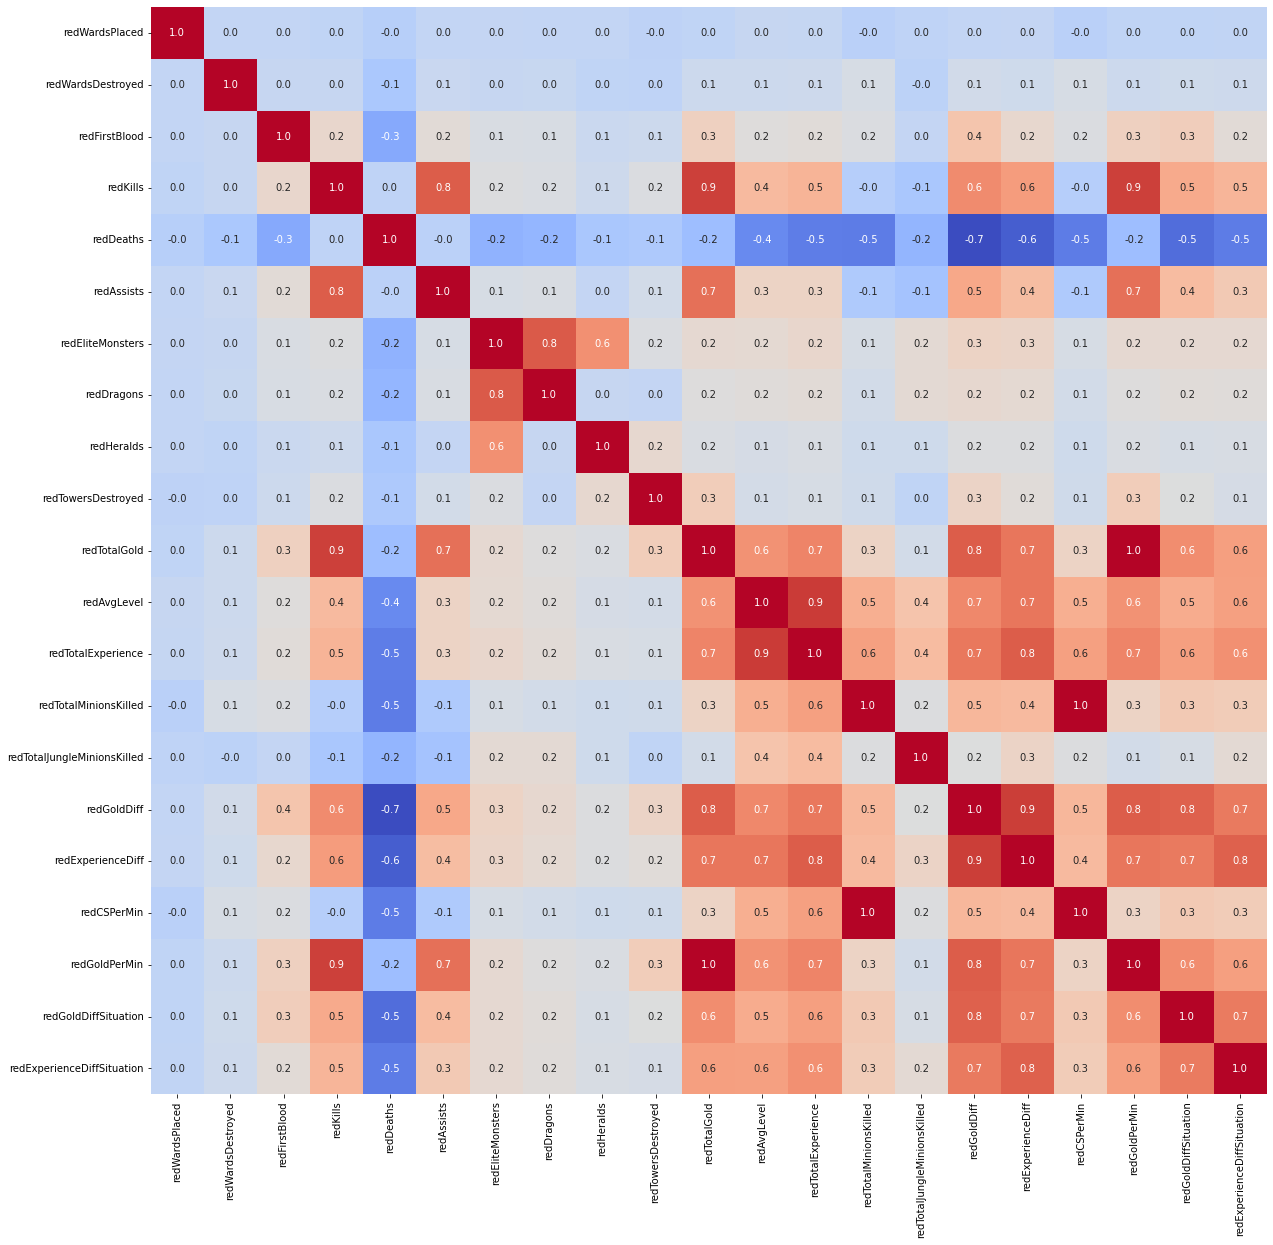

In [23]:
corr = df[[col for col in df.columns if 'red' in col and col != 'blueWins']].corr()
f,ax = plt.subplots(figsize=(20, 20))
p = sns.heatmap(corr,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                ax=ax)

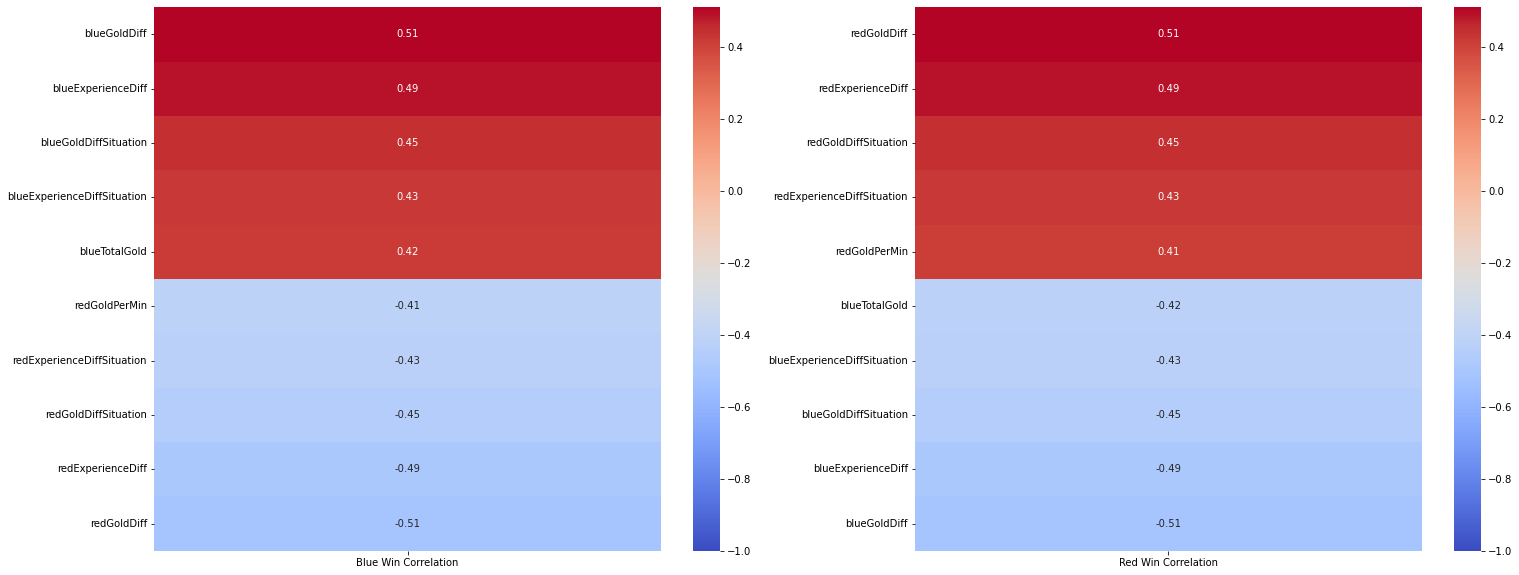

<Figure size 432x432 with 0 Axes>

In [24]:
df['blueWins'] = df['blueWins'].map({'Blue Side': 1, 'Red Side': 0})

blue_win = df[[col for col in df.columns if col != 'blueWins']].corrwith(df['blueWins']).to_frame().sort_values(by = 0, ascending = False)
blue_win = pd.concat([blue_win.head(5), blue_win.tail(5)])
blue_win.columns = ['Blue Win Correlation']
blue_win

red_win = df[[col for col in df.columns if col != 'blueWins']].corrwith(df['blueWins'].map({0:1, 1:0})).to_frame().sort_values(by = 0, ascending = False)
red_win = pd.concat([red_win.head(5), red_win.tail(5)])
red_win.columns = ['Red Win Correlation']
red_win

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.figure(figsize=(6,6))

sns.heatmap(blue_win,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           ax = ax1);

sns.heatmap(red_win,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           ax = ax2);

In [29]:
%pip install xgboost

     -------------------------------------- 89.1/89.1 MB 478.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [31]:
X=data.drop(['blueWins', 'gameId'], axis=1)
y=data['blueWins']

KeyError: "['blueWins', 'gameId'] not found in axis"

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

sel_rf=SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1))

sel_rf.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [33]:
sel_rf.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False])

In [34]:
print("Total number of features in the dataset: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", sel_rf.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-sel_rf.get_support().sum()))

Total number of features in the dataset:  42
Total number of features after removing according to RF feature importances:  20
Total features removed:  22


In [35]:
X_train_rfc=sel_rf.transform(X_train)
X_test_rfc=sel_rf.transform(X_test)

X_train_rfc.shape, X_test_rfc.shape

((7903, 20), (1976, 20))

In [36]:
def classifier_model(X_train, X_test, y_train, y_test, method, data):
    rf_clf=RandomForestClassifier(n_estimators=1000, random_state=1)
    rf_clf.fit(X_train, y_train)
    y_pred_rf=rf_clf.predict(X_test)
    score_rlf=accuracy_score(y_test, y_pred_rf)
    print("---Feature Selection method: {}---". format(method))
    print("---Checking Accuracy with {}---".format(data))
    print("The accuracy score of Random Forest:", score_rlf)
    
    
    gb_clf=GradientBoostingClassifier(n_estimators=1000, random_state=1)
    gb_clf.fit(X_train, y_train)
    y_pred_gb=gb_clf.predict(X_test)
    score_gb=accuracy_score(y_test, y_pred_gb)
    print("The accuracy score of Gradient Boosting:", score_rlf)

In [37]:
classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "Random Forest Feature importance", "Reduced Features")

---Feature Selection method: Random Forest Feature importance---
---Checking Accuracy with Reduced Features---
The accuracy score of Random Forest: 0.6993927125506073
The accuracy score of Gradient Boosting: 0.6993927125506073


In [39]:
sel_rfe=RFE(RandomForestClassifier(n_estimators=100, random_state=1),n_features_to_select=20)
sel_rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=1), n_features_to_select=20)

In [40]:
sel_rfe.get_support().sum()

20

In [41]:
X_train_rfe=sel_rfe.transform(X_train)
X_test_rfe=sel_rfe.transform(X_test)

classifier_model(X_train_rfe, X_test_rfe, y_train, y_test, "Recursive feature extraction with RF", "Reduced Features")

---Feature Selection method: Recursive feature extraction with RF---
---Checking Accuracy with Reduced Features---
The accuracy score of Random Forest: 0.707995951417004
The accuracy score of Gradient Boosting: 0.707995951417004


In [42]:
classifier_model(X_train, X_test, y_train, y_test, "Recursive feature extraction with RF", "All Features")

---Feature Selection method: Recursive feature extraction with RF---
---Checking Accuracy with All Features---
The accuracy score of Random Forest: 0.7105263157894737
The accuracy score of Gradient Boosting: 0.7105263157894737


In [43]:
sel_rfe_gb=RFE(GradientBoostingClassifier(n_estimators=100, random_state=1), n_features_to_select=22)
sel_rfe_gb.fit(X_train, y_train)

X_train_rfe_gb=sel_rfe_gb.transform(X_train)
X_test_rfe_gb=sel_rfe_gb.transform(X_test)

classifier_model(X_train_rfe_gb, X_test_rfe_gb, y_train, y_test, "Recursive feature extraction with GB", "Reduced Features")

---Feature Selection method: Recursive feature extraction with GB---
---Checking Accuracy with Reduced Features---
The accuracy score of Random Forest: 0.7090080971659919
The accuracy score of Gradient Boosting: 0.7090080971659919


In [44]:
for index in range(14,39):
    sel_rfe_gb=RFE(GradientBoostingClassifier(n_estimators=100, random_state=1), n_features_to_select=index)
    sel_rfe_gb.fit(X_train, y_train)

    X_train_rfe_gb=sel_rfe_gb.transform(X_train)
    X_test_rfe_gb=sel_rfe_gb.transform(X_test)
    
    clf_gb=GradientBoostingClassifier(n_estimators=200, random_state=1)
    clf_gb.fit(X_train_rfe_gb, y_train)
    y_pred_gb=clf_gb.predict(X_test_rfe_gb)
    score_gb=accuracy_score(y_test, y_pred_gb)
    print("Number of features: ", index)
    print("Accuracy: ", score_gb)
    print()

Number of features:  14
Accuracy:  0.7181174089068826

Number of features:  15
Accuracy:  0.7201417004048583

Number of features:  16
Accuracy:  0.7211538461538461

Number of features:  17
Accuracy:  0.7160931174089069

Number of features:  18
Accuracy:  0.7176113360323887

Number of features:  19
Accuracy:  0.7171052631578947

Number of features:  20
Accuracy:  0.7171052631578947

Number of features:  21
Accuracy:  0.7176113360323887

Number of features:  22
Accuracy:  0.7176113360323887

Number of features:  23
Accuracy:  0.7191295546558705

Number of features:  24
Accuracy:  0.7176113360323887

Number of features:  25
Accuracy:  0.7181174089068826

Number of features:  26
Accuracy:  0.7140688259109311

Number of features:  27
Accuracy:  0.7125506072874493

Number of features:  28
Accuracy:  0.7125506072874493

Number of features:  29
Accuracy:  0.7130566801619433

Number of features:  30
Accuracy:  0.7145748987854251

Number of features:  31
Accuracy:  0.7160931174089069

Number of 

In [45]:
sel_rfe_gb_new=RFE(GradientBoostingClassifier(n_estimators=1000, random_state=1), n_features_to_select=16)
sel_rfe_gb_new.fit(X_train, y_train)

X_train_final=sel_rfe_gb_new.transform(X_train)
X_test_final=sel_rfe_gb_new.transform(X_test)

In [46]:
gb_clf_1=GradientBoostingClassifier(n_estimators=400, random_state=1)

gb_clf_1.fit(X_train_final, y_train)
y_pred_gb_1=gb_clf_1.predict(X_test_final)

score_gb_1=accuracy_score(y_test, y_pred_gb_1)

print("Accuracy:" ,score_gb_1)

Accuracy: 0.7054655870445344


In [47]:
params_grid_gb={'n_estimators' : [100,200,400,600,1000,1200],
                'min_samples_split': [100,200,300,400],
                'min_samples_leaf' : [10,20,30,40,60,100],
                'max_depth' : [2,4,6,8],
                'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
               }

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gridsearch_gb=RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=params_grid_gb, cv=5, scoring='accuracy')

In [49]:
gridsearch_gb.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1, 5, 10],
                                        'max_depth': [2, 4, 6, 8],
                                        'min_samples_leaf': [10, 20, 30, 40, 60,
                                                             100],
                                        'min_samples_split': [100, 200, 300,
                                                              400],
                                        'n_estimators': [100, 200, 400, 600,
                                                         1000, 1200]},
                   scoring='accuracy')

In [50]:
gridsearch_gb.best_score_

0.7217532566313581

In [51]:
gridsearch_gb.best_params_

{'n_estimators': 200,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_depth': 4,
 'learning_rate': 0.01}

In [52]:
#### Checking accuracy on Test set
y_pred_final_gb=gridsearch_gb.predict(X_test_final)

print("Accuracy of GBM with accuracy_scoreced features on test set", accuracy_score(y_test, y_pred_final_gb))

Accuracy of GBM with accuracy_scoreced features on test set 0.7165991902834008


In [53]:
gridsearch_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1, 5, 10],
                                        'max_depth': [2, 4, 6, 8],
                                        'min_samples_leaf': [10, 20, 30, 40, 60,
                                                             100],
                                        'min_samples_split': [100, 200, 300,
                                                              400],
                                        'n_estimators': [100, 200, 400, 600,
                                                         1000, 1200]},
                   scoring='accuracy')

In [54]:
gridsearch_gb.best_score_

0.7289644432701622

In [55]:
gridsearch_gb.best_params_

{'n_estimators': 100,
 'min_samples_split': 400,
 'min_samples_leaf': 60,
 'max_depth': 8,
 'learning_rate': 0.01}

In [56]:
#### Checking accuracy on Test set
y_pred_final_gb_all=gridsearch_gb.predict(X_test)

print("Accuracy of GBM with all features on test set", accuracy_score(y_test, y_pred_final_gb_all))

Accuracy of GBM with all features on test set 0.7171052631578947


In [57]:
cols=[x[4:] for x in data.columns if "blue" in x and x[4:]!= 'Wins']
cols

[]